<a href="https://colab.research.google.com/github/ebinjosephx/project/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 1,748
Trainable params: 1,748
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
18/18 [==============================] - 1s 15ms/step - loss: 1.3501 - accuracy: 0.3138 - val_loss: 1.2846 - val_accuracy: 0.4573
Epoch 2/150
18/18 [==============================] - 0s 4ms/step - loss: 1.2492 - accuracy: 0.4661 - val_loss: 1.2067 - val_accuracy: 0.4744
Epoch 3/150
18/18 [==============

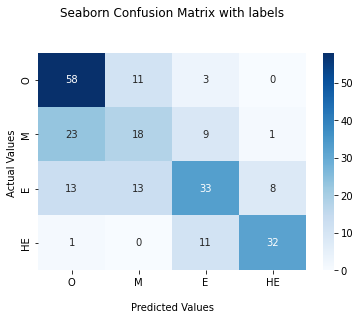

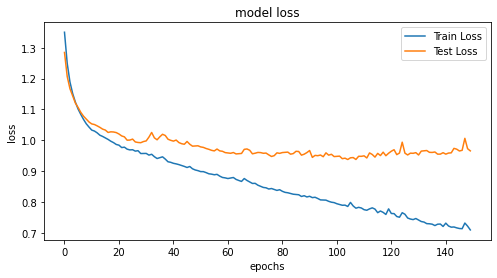

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report

from keras.utils.np_utils import to_categorical

dataset = pd.read_excel('/content/Copy of Pro-data4.xlsx')
sc = StandardScaler()
X = dataset.iloc[:,1:10].values
X = pd.DataFrame(sc.fit_transform(X))

y = dataset.iloc[:,-1]

y_cat= to_categorical(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size = 0.3, random_state = 42)

import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(64, activation='relu',input_dim=9))
classifier.add(Dense(16,  activation = 'relu'))

classifier.add(Dense(4, activation = 'softmax'))
classifier.summary()

classifier.compile(loss="categorical_crossentropy",optimizer="adam",metrics= ["accuracy"])

history=classifier.fit(x=X_train, y=y_train, epochs=150,validation_data=(X_test, y_test))




from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)
cf=confusion_matrix(y_test_class, y_pred_class)

from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred_class))


import seaborn as sns

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['O','M','E','HE'])
ax.yaxis.set_ticklabels(['O','M','E','HE'])

## Display the visualization of the Confusion Matrix.
plt.show()


plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()